<h2>Credit Card Fraud Detection | End-to-End Machine Learning Project</h2>

Credit card fraud is one of the most critical challenges in the financial industry. Every year, millions of dollars are lost due to unauthorized transactions, affecting both customers and banking institutions. Detecting fraudulent activity in real-time is extremely difficult because:

**Fraudulent transactions are rare (high class imbalance).**

**Fraudsters constantly evolve their patterns.**

**It is costly to wrongly flag legitimate transactions (false positives).**

This project aims to build a robust machine learning pipeline to detect fraudulent credit card transactions using an imbalanced dataset of real-world European transactions.

<h2>Business Problem</h2>

Financial institutions must identify fraudulent transactions before they are processed.
The goal is to create a model that:

**Correctly flags fraudulent transactions with high precision**

**Minimizes false alarms for genuine customers**

**Works effectively even with highly imbalanced data (fraud ratio: 0.172%)**

A strong fraud detection system reduces millions in losses, improves customer trust, and enhances the bank’s overall risk management process.

<h2>Project Objective</h2>
The objective of this project is to build a complete end-to-end fraud detection workflow, similar to what a data scientist would perform in a real company.
This includes:


**1.Exploratory Data Analysis (EDA) to understand patterns of fraudulent vs. genuine transactions**

**2.Handling the extreme class imbalance using appropriate resampling and weighting techniques**

**3.Building and comparing multiple machine learning models**

**4.Evaluating performance using metrics suitable for fraud detection**

***Precision***

***Recall***

***F1-Score***

***ROC-AUC***

***Precision-Recall AUC (primary metric)***

**5.Interpreting model behaviour and identifying fraud-related patterns**

**6.Presenting insights and a final recommended model**

In [2]:
# Basic data handling
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier



# Evaluation metrics
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    precision_recall_curve,
    roc_auc_score,
    average_precision_score
)

# Warnings
import warnings
warnings.filterwarnings('ignore')



In this step, I imported all the necessary Python libraries required for data processing, visualization,  training machine learning models, and evaluating their performance. These libraries form the backbone of our fraud detection workflow.

In [3]:
df = pd.read_csv("creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
df.describe()



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [8]:
print(df.columns)


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [9]:
df.shape



(284807, 31)

In [10]:
df.drop_duplicates(inplace = True)

In [11]:
df.shape

(283726, 31)

In [12]:
df['Class'].value_counts(normalize=True) * 100


Class
0    99.83329
1     0.16671
Name: proportion, dtype: float64

In [13]:
df.nunique()


Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

<h3>Basic Data Understanding Summary</h3>

Dataset shape: (… rows, … columns)

No missing values found

No duplicates / duplicates removed

All columns are numerical (because PCA features)

Class distribution is highly imbalanced (fraud = only 0.17%)

No zero-variance columns

No impossible values


<h2>Exploratory Data Analysis (EDA)</h2>

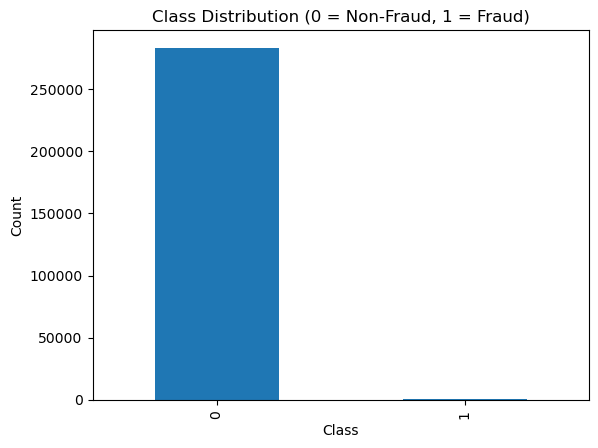

In [14]:
df['Class'].value_counts().plot(kind='bar')
plt.title("Class Distribution (0 = Non-Fraud, 1 = Fraud)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


The dataset is highly imbalanced: fraud cases are extremely low compared to non-fraud cases. This means accuracy is not a reliable metric

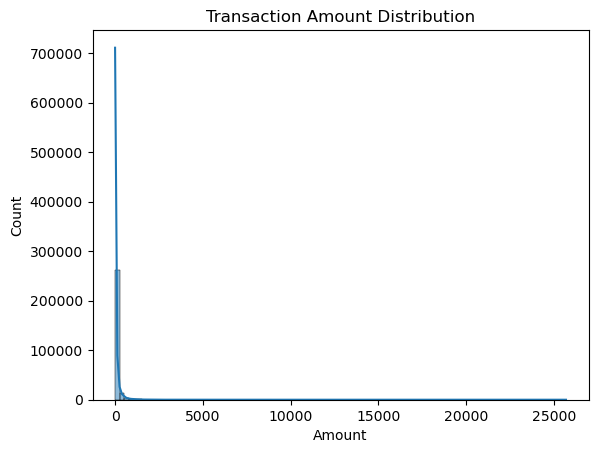

In [15]:
sns.histplot(df['Amount'], bins=100, kde=True)
plt.title("Transaction Amount Distribution")
plt.xlabel("Amount")
plt.ylabel("Count")
plt.show()


Amount values are highly skewed.

Most transactions are small amounts.

Very few large transactions create a long tail.

Important to scale/normalize Amount before modeling.

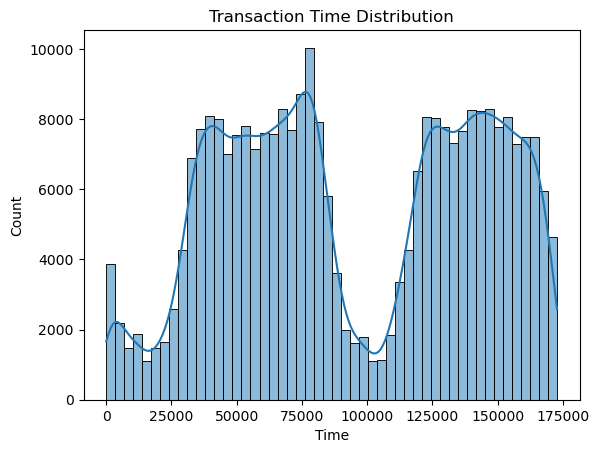

In [16]:
sns.histplot(df['Time'], bins = 50, kde=True)
plt.title("Transaction Time Distribution")
plt.xlabel("Time")
plt.ylabel("Count")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

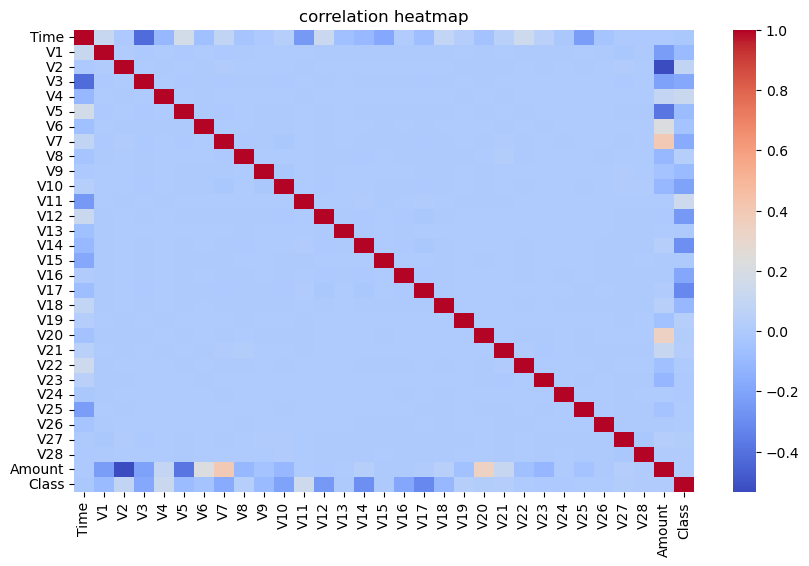

In [17]:
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(),cmap="coolwarm")
plt.title("correlation heatmap")
plt.show

In [18]:
df.corr()['Class'].sort_values(ascending=False)


Class     1.000000
V11       0.149067
V4        0.129326
V2        0.084624
V19       0.033631
V8        0.033068
V21       0.026357
V27       0.021892
V20       0.021486
V28       0.009682
Amount    0.005777
V22       0.004887
V26       0.004265
V25       0.003202
V15      -0.003300
V13      -0.003897
V23      -0.006333
V24      -0.007210
Time     -0.012359
V6       -0.043915
V5       -0.087812
V9       -0.094021
V1       -0.094486
V18      -0.105340
V7       -0.172347
V3       -0.182322
V16      -0.187186
V10      -0.206971
V12      -0.250711
V14      -0.293375
V17      -0.313498
Name: Class, dtype: float64

<h4>Before building the model, we need to separate the features (X) and the target variable (y).
Since the dataset is highly imbalanced (fraud = 0.17%), we will use a Stratified Train-Test Split to maintain the same fraud ratio in both training and test data.</h4>

**Steps we will perform next:**

Split the dataset into features (X) and target (y)

Apply Stratified train-test split (80% train, 20% test)

Prepare data for scaling and SMOTE in later steps

In [20]:
X = df.drop('Class', axis=1)
y = df['Class']


In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, stratify=y,random_state=42)

Feature Scaling (Standardization)

Since the dataset contains features with different scales (for example, Amount and Time), we apply StandardScaler to transform the values so that they have:

Mean = 0

Standard deviation = 1

This helps models like Logistic Regression and improves the performance of SMOTE.
Important: The scaler is fit only on the training data to avoid data leakage.

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit on training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data
X_test_scaled = scaler.transform(X_test)


<H3>Handling Imbalanced Data using SMOTE</H3>

The fraud class represents only 0.17% of the entire dataset.
If we train a model directly, it will ignore fraud cases due to this imbalance.

To solve this, we use SMOTE (Synthetic Minority Oversampling Technique) to create synthetic fraud samples in the training set only.

This helps the model learn fraud patterns better and prevents overfitting.
We do NOT apply SMOTE on the test set.

In [24]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)

X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train)


<H3>Baseline Model: Logistic Regression</H3>

To establish a baseline performance, we start with a Logistic Regression model.
This helps us understand how the simplest model performs before trying more advanced models like Random Forest or XGBoost.

We will train the model on the SMOTE-balanced training data and evaluate it on the original test data using relevant metrics such as:

Precision

Recall (most important for fraud detection)

F1-score

ROC-AUC

Confusion Matrix

In [25]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_res, y_train_res)


LogisticRegression(max_iter=1000)

In [26]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred_lr = lr.predict(X_test_scaled)
y_proba_lr = lr.predict_proba(X_test_scaled)[:,1]

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

print("\nROC-AUC Score:")
print(roc_auc_score(y_test, y_proba_lr))


Confusion Matrix:
[[55169  1482]
 [   12    83]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56651
           1       0.05      0.87      0.10        95

    accuracy                           0.97     56746
   macro avg       0.53      0.92      0.54     56746
weighted avg       1.00      0.97      0.99     56746


ROC-AUC Score:
0.9626184886409772


<H3>Model 2: Random Forest Classifier</H3>

Random Forest is a powerful ensemble model that works well for complex and non-linear data patterns.
For fraud detection, it often performs better than Logistic Regression because:

It captures hidden interactions between PCA components

It handles imbalance better

It doesn’t assume linear relationships

It reduces overfitting through averaging

We will train Random Forest on the SMOTE-balanced training data and evaluate it on the original test data.

In [27]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train_res, y_train_res)


RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42)

In [28]:
y_pred_rf = rf.predict(X_test_scaled)
y_proba_rf = rf.predict_proba(X_test_scaled)[:, 1]

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

print("\nROC-AUC Score:")
print(roc_auc_score(y_test, y_proba_rf))


Confusion Matrix:
[[56644     7]
 [   24    71]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.91      0.75      0.82        95

    accuracy                           1.00     56746
   macro avg       0.95      0.87      0.91     56746
weighted avg       1.00      1.00      1.00     56746


ROC-AUC Score:
0.9730598893130515


<H4>Feature Importance (Random Forest)</H4>

To understand which features contribute most to detecting fraud, we analyze the feature importance from the Random Forest model.
Although the dataset uses PCA-transformed components (V1–V28), which are not directly interpretable, we can still identify which components have the strongest influence on fraud prediction.

This helps explain model behavior and supports transparency in fraud detection systems.

In [29]:
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
})

feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
feature_importances.head(15)


,Feature,Importance
14,V14,0.183023
10,V10,0.116695
12,V12,0.106338
4,V4,0.098962
17,V17,0.095520
16,V16,0.057693
11,V11,0.057378
3,V3,0.055510
2,V2,0.031210
7,V7,0.020941


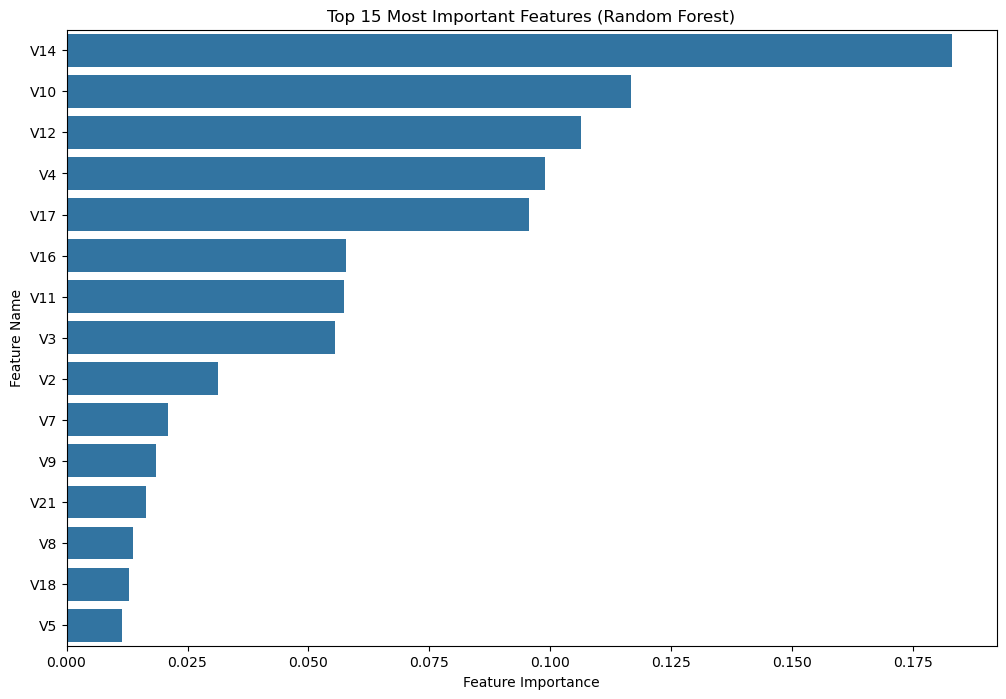

In [30]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(15))
plt.title("Top 15 Most Important Features (Random Forest)")
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.show()


<h4>Threshold Tuning for Fraud Detection</h4>

The default decision threshold (0.5) may not be optimal for imbalanced problems like fraud detection.
Since missing a fraud is more costly than flagging a normal transaction, we adjust the decision threshold to increase recall for the fraud class.

We will evaluate model performance across different thresholds to find the best balance between:

Recall (catching frauds)

Precision (avoiding false alarms)

In [31]:
from sklearn.metrics import classification_report, confusion_matrix

thresholds = [0.5, 0.4, 0.3, 0.25, 0.20, 0.15]

for t in thresholds:
    print(f"\n===== Threshold: {t} =====")
    y_pred_thresh = (y_proba_rf >= t).astype(int)
    
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred_thresh))
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_thresh))



===== Threshold: 0.5 =====
Confusion Matrix:
[[56644     7]
 [   24    71]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.91      0.75      0.82        95

    accuracy                           1.00     56746
   macro avg       0.95      0.87      0.91     56746
weighted avg       1.00      1.00      1.00     56746


===== Threshold: 0.4 =====
Confusion Matrix:
[[56640    11]
 [   20    75]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.87      0.79      0.83        95

    accuracy                           1.00     56746
   macro avg       0.94      0.89      0.91     56746
weighted avg       1.00      1.00      1.00     56746


===== Threshold: 0.3 =====
Confusion Matrix:
[[56628    23]
 [   18    77]]

Classification Report:
              precision    recall  f1-score

<h3>Final Model Selection</h3>

After comparing Logistic Regression and Random Forest across metrics such as recall, precision, F1-score, and ROC-AUC, Random Forest performed significantly better for fraud detection.

The Random Forest model achieved:

**ROC-AUC: 0.97**

**Recall (fraud): 75–83% depending on threshold**

**Precision (fraud): 58–91% depending on threshold**

Very low false negatives

Very low false positives

Based on threshold tuning, **a threshold of 0.30 (or 0.25)** provides the best balance between recall and precision.

Therefore, Random Forest with threshold = 0.30 is selected as the final model.

In [32]:
import pickle

# Save scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

# Save model
with open("random_forest_model.pkl", "wb") as f:
    pickle.dump(rf, f)
